# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

**Para realizar el taller:**

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python.

**Para el envío:**

Al terminar el taller, y dentro de las fechas especificadas en la plataforma de OLADE, debe subir este archivo a su perfil de **GitHub**. En la plataforma debe copiar el enlace a este archivo, a modo de entregable. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

                  
x=[]                                     # Se define que x es un arreglo o matriz
for n in range(1995,2018):               # Este For recorre archivo a archivo desde 1995 hasta 2017
    if n < 2000:
        skip = 3         # Se necesita un salto de tres filas en el los archivos menores a 2000
    else:
        skip=2          # Se necesita un salto de tres filas en el los archivos mayores o igual a 2000
   
    nombrearchivo= 'Precio_Bolsa_Nacional_($kwh)_'+str(n)   # eSTA LINEA COMPLETA EL NOMBRE DEL ARCHIVO A BUSCAR
    if n>=2016:
        nombrearchivo +='.xls'                              #SE LE AGREGA LA EXTENSION DEL ARCHIVO.
    else:
        nombrearchivo+='.xlsx'
        
    y = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols=24)   # se lee el archivo
    x.append(y)                                                      # se unen los arhivos pero van uno a la par de otro
    z=pd.concat(x)                                                   # se sobrepone una lista bajo la otra 

z.head()                                                            # Se imprime la cabecera

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
len(z)-len (z.dropna()) # dropna elimina registros con faltantes.---No se modifica la matriz solo se calcula

28

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
len(z)-len(z.drop_duplicates()) # drop_duplicates elimina registros duplicados.--- No se modifica la matriz solo se calcula

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
z=z.dropna().drop_duplicates()# se eliminan datos duplicados y faltantes y se escribe la nueva matriz en la misma variable

In [6]:
len(z)   # se mide la longuitud de la nueva matriz

7875

**5.--** Compute y grafique el precio primedio diario.

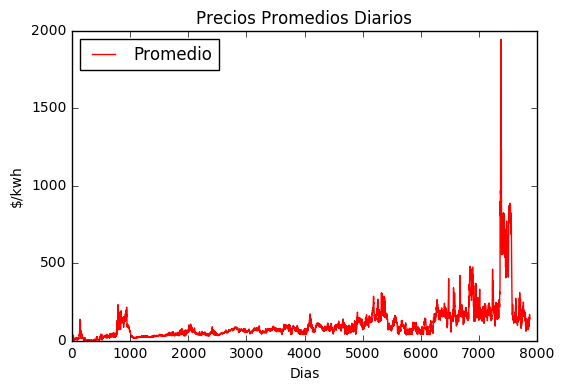

In [7]:
prom = z.mean(axis=1)# calcula el promedio diario por cada registro existente.

# Codigo para graficar
plt.xlabel('Dias')
plt.ylabel('$/kwh')
plt.title('Precios Promedios Diarios')
plt.plot(pd.Series(prom).values,label="Promedio",linestyle="-",color='r')       #se definen caracteristicas del grafico 
plt.legend(loc="upper left")   # pone las etiquetas


**6.--** Compute y grafique el precio máximo por mes.

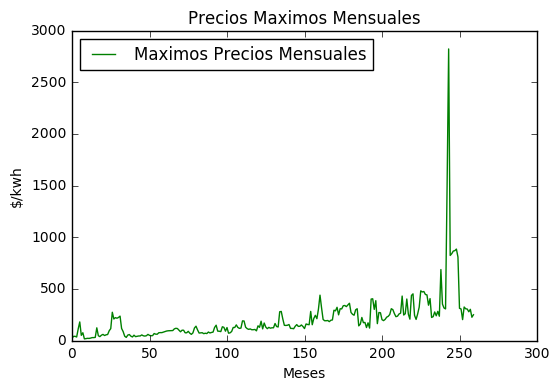

In [31]:
w=[]
for n in range(len(z['Fecha'])):  # el for creara un identificador unico para cada mes y luego con este se agrupa segun lo que se necesite.
    w.append (str(z.iloc[n,0])[0:7])
z['aniomes']=w                    # la nueva columna se llama aniomes.. es un identificador unico por mes
maxmes = z.groupby('aniomes').max()   # calcula el maximo del mes y el resultado es por cada hora
maxmes= maxmes.max(axis=1)            # calcula el resultado final del mes obteniendo el maximo del grupo y de la hora.

# codigo de grafico
plt.xlabel('Meses')
plt.ylabel('$/kwh')
plt.title('Precios Maximos Mensuales')
plt.plot(pd.Series(maxmes).values,label="Maximos Precios Mensuales",linestyle="-", color ='g')        
plt.legend(loc="upper left")


**7.--** Compute y grafique el precio mínimo mensual.

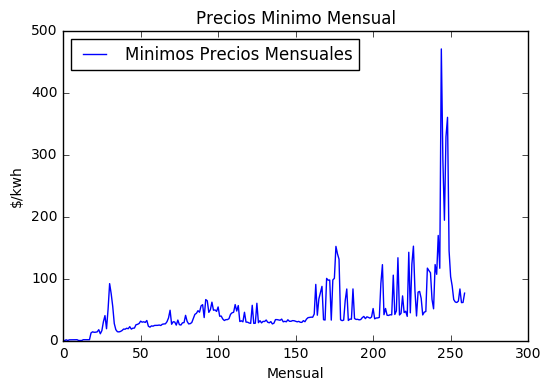

In [30]:
minmes = z.groupby('aniomes').min() #se agrupan los minimos por mes y por hora
minmes = minmes.min(axis=1)         # obtiene el minimo del mes 

#Codigo de Grafico
plt.xlabel('Mensual')
plt.ylabel('$/kwh')
plt.title('Precios Minimo Mensual')
plt.plot(pd.Series(minmes).values,label="Minimos Precios Mensuales",linestyle="-", color ='b')        
plt.legend(loc="upper left")


**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

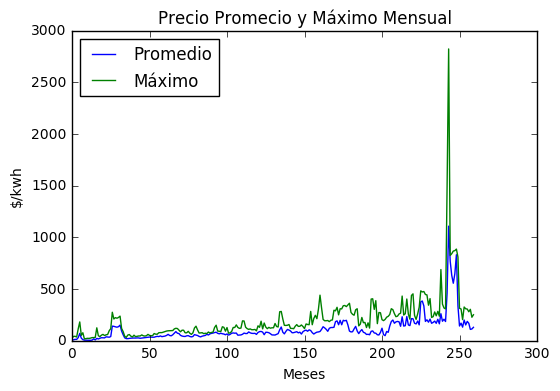

In [11]:
prommes = z.groupby('aniomes').mean()
prommes= prommes.mean(axis=1)
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
plt.title('Precio Promecio y Máximo Mensual')
plt.plot(pd.Series(prommes).values,label="Promedio",linestyle="-")        
plt.plot(pd.Series(maxmes).values, label="Máximo",linestyle="-")  
plt.legend(loc="upper left")

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [14]:
from datetime import datetime, date, time, timedelta
import calendar

#Define los Dias de la semana en base a la Fecha
fecha=[]
fecha=z['Fecha']
z['Fecha']=pd.to_datetime(z['Fecha'], format="%Y-%m-%d")
z['Dia']=z['Fecha'].dt.weekday_name

#Filtrado de Dias por Laborales.
Lab = z['Dia'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
Lab = z[Lab]


#Se le cambia el index a toda la matriz por un identificador unico ... esto sirve para recorrer toda la matriz desde un indicador unico.
indicador = ['{}'.format(n) for n in range(len(Lab))]
Lab.index = indicador

In [15]:

u=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Lab)):
    x = pd.Series(Lab.loc[str(n)]).values[1:25]
    u.append ([i for i, e in enumerate(x) if e == max(x)])
    

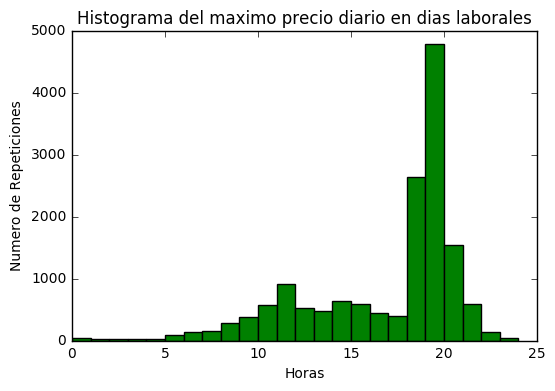

In [29]:
a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repite.
for n in range(len(u)):
    for i in range (len(u[n])):
        a.append(u[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("Numero de Repeticiones")
plt.title('Histograma del maximo precio diario en dias laborales')
plt.bar(range(24),rep,color='g',width = 1)
plt.show()


**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

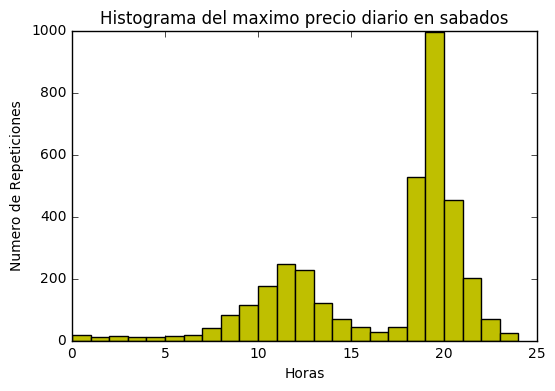

In [28]:
#Filtrado de Dias por Laborales.
Sab = z['Dia'].isin(['Saturday'])
Sab = z[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 

s=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("Numero de Repeticiones")
plt.title('Histograma del maximo precio diario en sabados')
plt.bar(range(24),rep,color='y',width = 1)
plt.show()


**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

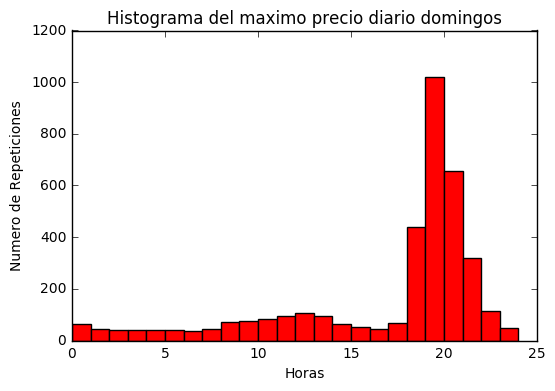

In [27]:
#Filtrado de Dias por Laborales.
Sab = z['Dia'].isin(['Sunday'])
Sab = z[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 

s=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
    
plt.xlabel("Horas")
plt.ylabel("Numero de Repeticiones")
plt.title('Histograma del maximo precio diario domingos')
plt.bar(range(24),rep,color='r',width = 1)
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [58]:
A=[]
nmatriz=z
for n in range(len(nmatriz['Fecha'])):
    A.append (str(nmatriz.iloc[n,0])[0:4])
nmatriz['anio']=A
minanio = nmatriz.groupby('anio').min()
minanio= minanio.min(axis=1)

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [67]:
#cambia el index de la matriz z
indicador = ['{}'.format(n) for n in range(len(z))]
z.index = indicador


In [68]:
# accede a cada dato de la columna aniomes y obtine el promedio del mes en funcion de ese dato
pmes=[]
for n in range (len(z)):
    y=z.groupby('aniomes')
    f=z.loc[y.groups[z['aniomes'][n]]].mean() #El entero sera n
    f=f.mean()
    pmes.append(f)

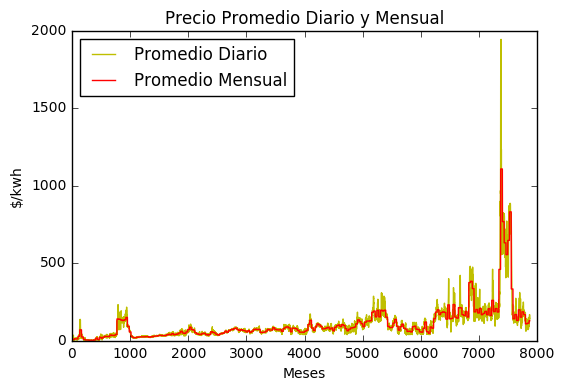

In [70]:
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
plt.title('Precio Promedio Diario y Mensual')
plt.plot(pd.Series(prom).values,label="Promedio Diario",linestyle="-", color = 'y')        
plt.plot(pd.Series(pmes).values, label="Promedio Mensual",linestyle="-", color = 'r')  
plt.legend(loc="upper left")